In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Determinar si una persona ganara mas de 50k o no

### Carga de datos

In [2]:
dataOriginal = pd.read_csv("adult_data.csv")

# fnlwgt: numero de personas que representa la entrada
dataOriginal.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", 
                "salary"] #este es el que queremos predecir

print(dataOriginal.shape) #32561 casos
dataOriginal.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Creamos una copia del dataframe para trabajarla

dataModificada = dataOriginal.copy();

dataModificada.shape

(32561, 15)

## Procesamiento

### Valores perdidos 

In [4]:
# revisamos si hay valores perdidos

def buscarValoresPerdidos(df, parametros):
    
    columnaConValoresPerdidos = []

    for parametro in parametros:  
        cantPerdida = df[parametro].apply(lambda x: 1 if (x == " ?") else 0).sum()
        if(cantPerdida > 0): 
            
            columnaConValoresPerdidos.append(str(parametro) + ": " + str(cantPerdida))
            
    if (len(columnaConValoresPerdidos) == 0): return "Sin valores perdidos"
            
    return columnaConValoresPerdidos

buscarValoresPerdidos(dataModificada, ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                                       "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                                       "hours-per-week", "native-country", "salary"])

['workclass: 1836', 'occupation: 1843', 'native-country: 583']

In [5]:
# hay valores perdidos en workclass, occupation y native-country. Representan el 5% del total, vamos a eliminarlo

for parametro in ["workclass",  "occupation", "native-country"]:
    indexEliminar=dataModificada[dataModificada[parametro] == " ?"].index
    dataModificada=dataModificada.drop(indexEliminar)

buscarValoresPerdidos(dataModificada,["workclass",  "occupation", "native-country"])


'Sin valores perdidos'

In [6]:
dataModificada.shape

(30162, 15)

Se elimino la data perdida. Se redujo de 32561 a 30162 (7%)

### Eliminamos columnas no utiles

In [7]:
# Eliminamos la columna education-num, ya que es equivalente a education y fnlwgt ya que para lo que queremos analizar no 
# nos es util

dataModificada = dataModificada.drop(columns=["education-num", "fnlwgt"])
dataModificada

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Paso de valores escritos a numericos

In [8]:
# workclass, marital-status, occupation, relationship, race, sex y native-country son parametros texto
# es necesario pasarlos a numerico
# vemos como esta compuesto cada uno

for parametro in ["workclass", "education", "marital-status", "occupation",
                  "relationship", "race", "sex", "native-country"]:

    print(str(parametro) + ': ' + str(dataModificada[parametro].unique().size))
    print(dataModificada[parametro].unique())
    print("")
    

workclass: 7
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

education: 16
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

marital-status: 7
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation: 14
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

relationship: 6
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race: 5
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex: 2
[' Male' ' Female']

native-country: 41
[' United-States' ' Cuba' ' Jamaica' ' 

In [9]:
def oneHotEncoding(df, columnas):
    
    # Elimino las columnas a las que hare one hot
    dataModificadaTemp = df.drop(columns=columnas)

    # Usamos la funcion pd.get_dummies para hacer one hot encoding 
    oneHot = pd.get_dummies(df[columnas])

    # unimos todo
    return pd.concat([dataModificadaTemp, oneHot], axis=1)

dataModificada = oneHotEncoding(dataModificada, ["workclass", "education", "marital-status",
                                "occupation", "relationship", "race", "sex", "native-country"])

dataModificada.head()

,age,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,2174,0,40,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analisamos las columnas numericas

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

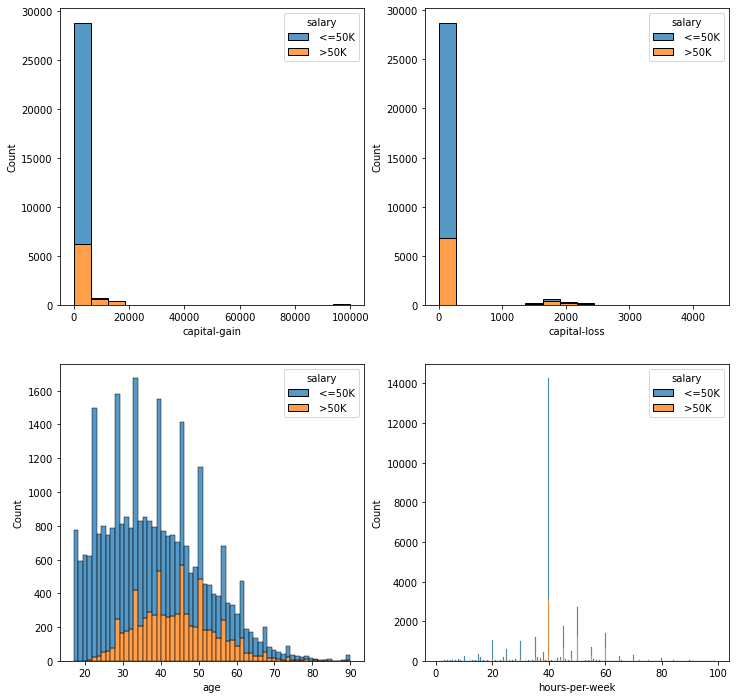

In [10]:
# Vamos a ver age, capital-gain, capital-loss, hours-per-week

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.histplot(data= dataModificada, x= "capital-gain",   hue= "salary",  multiple="stack", ax=axes[0,0])
sns.histplot(data= dataModificada, x= "capital-loss",   hue= "salary",  multiple="stack", ax=axes[0,1])
sns.histplot(data= dataModificada, x= "age",            hue= "salary",  multiple="stack", ax=axes[1,0])
sns.histplot(data= dataModificada, x= "hours-per-week", hue= "salary",  multiple="stack", ax=axes[1,1])


In [11]:
dataModificada[["capital-gain", "capital-loss", "age", "hours-per-week"]].describe()

,capital-gain,capital-loss,age,hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,1092.007858,88.372489,38.437902,40.931238
std,7406.346497,404.298370,13.134665,11.979984
min,0.000000,0.000000,17.000000,1.000000
25%,0.000000,0.000000,28.000000,40.000000
50%,0.000000,0.000000,37.000000,40.000000
75%,0.000000,0.000000,47.000000,45.000000
max,99999.000000,4356.000000,90.000000,99.000000


<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

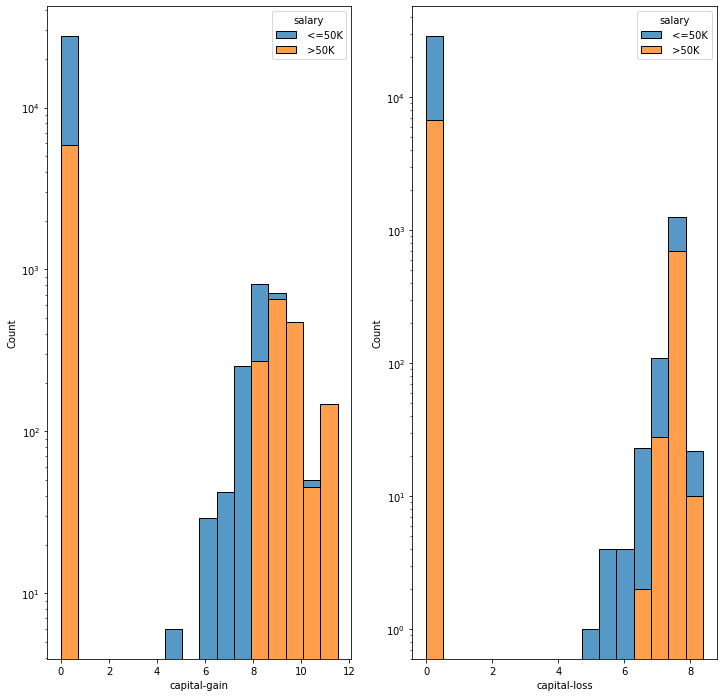

In [12]:
# los datos de capital-gain y capital-loss son muy grandes y dispares (se ve con el std)
# vamos a pasarlo a escala logaritmica para una mejor implementacion

dataModificada["capital-gain"] = np.where(dataModificada["capital-gain"] == 0, 1, dataModificada["capital-gain"]) 
dataModificada["capital-loss"] = np.where(dataModificada["capital-loss"] == 0, 1, dataModificada["capital-loss"]) 
# si se deja los valores de '0' el log daria error, por ello se pasa a 1 que el log dara 0

dataModificada[["capital-gain", "capital-loss"]] = np.log(dataModificada[["capital-gain", "capital-loss"]])
#dataModificada["capital-gain", "capital-loss"] = np.log(dataModificada["capital-gain", "capital-loss"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

sns.histplot(data= dataModificada, x= "capital-gain", hue= "salary", multiple="stack", 
             log_scale=(False, True), ax=axes[0])

sns.histplot(data= dataModificada, x= "capital-loss", hue= "salary", multiple="stack",
             log_scale=(False, True),  ax=axes[1])

In [13]:
dataModificada[["capital-gain", "capital-loss"]].describe()

,capital-gain,capital-loss
count,30162.000000,30162.000000
mean,0.743627,0.355199
std,2.470462,1.594890
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512915,8.379309


Los valores de capital-gain pasaron de 0-99999 a 0-12. Los valores de capital-loss pasaron de 0-4300 a 0-8

In [14]:
print("capital-gain: " + str(dataModificada["capital-gain"].apply(lambda x: 1 if (x == 0) else 0).sum()/30162))
print("capital-loss: " + str(dataModificada["capital-loss"].apply(lambda x: 1 if (x == 0) else 0).sum()/30162))
print("Horas por semana: " + str(dataModificada["hours-per-week"].apply(lambda x: 1 if (x > 70) else 0).sum()/30162))

capital-gain: 0.9158543863139049
capital-loss: 0.9526888137391419
Horas por semana: 0.015250978051853326


Si bien capital gain y loss esta concetrado en 0, por el momento lo vamos a dejar, a posteriori se analizara si afecta el eliminarlo. En las horas por semana hay un 1% que supera mas de 70hs (serian mas de 10 horas todos los dias). Vamos a realizar una deteccion de anomalias

C:\ignacio\entornos\tf-pruebas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25.0: 0.10811617266759499
60.0: 0.08146011537696439


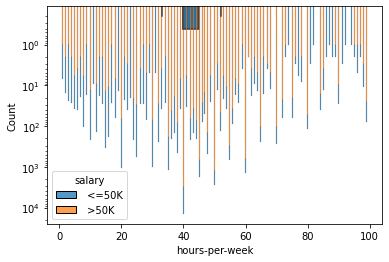

In [15]:
sns.boxplot(dataModificada['hours-per-week'])
sns.histplot(data= dataModificada, x= "hours-per-week", hue= "salary", multiple="stack", log_scale=(False, True))

def rango_anomalia(df, parametro):
    IQR = df[parametro].quantile(0.75) - df[parametro].quantile(0.25)
    
    lower_range = df[parametro].quantile(0.25) - (2 * 1.5 * IQR)
    upper_range = df[parametro].quantile(0.75) + (2 * 1.5 * IQR)
    
    print(str(lower_range) + ": " + 
          str(dataModificada["hours-per-week"].apply(lambda x: 1 if (x <= lower_range ) else 0).sum()/30162))
    
    print(str(upper_range) + ": " + 
          str(dataModificada["hours-per-week"].apply(lambda x: 1 if (x >= upper_range ) else 0).sum()/30162))
    #df.loc[df[parametro] <= lower_range, parametro] = lower_range
    #df.loc[df[parametro] >= upper_range, parametro] = upper_range
    
rango_anomalia(dataModificada, 'hours-per-week')


C:\ignacio\entornos\tf-pruebas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

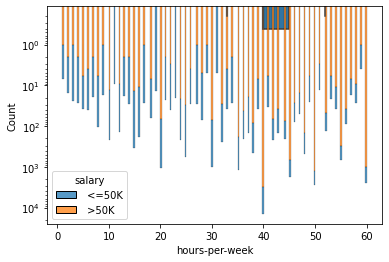

In [16]:
def eliminar_anomalia_superior(df, parametro):
    IQR = df[parametro].quantile(0.75) - df[parametro].quantile(0.25)
    
    upper_range = df[parametro].quantile(0.75) + (2 * 1.5 * IQR)
    
    df.loc[df[parametro] >= upper_range, parametro] = upper_range
    
eliminar_anomalia_superior(dataModificada, 'hours-per-week')

sns.boxplot(dataModificada['hours-per-week'])
sns.histplot(data= dataModificada, x= "hours-per-week", hue= "salary", multiple="stack", log_scale=(False, True))

### Vamos por el salary 

In [17]:
# Vemos que valores hay

dataModificada['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
# solo hay dos valores: mayor a 50K y menor a 50K
# cambiamos a 1 y 0: 1 para mayot a 50K

dataModificada["salary"] = np.where(dataModificada["salary"] == ' >50K', 1, 0)

dataModificada['salary'].unique()

array([0, 1])

Los valores pasaron de "<=50K", ">50K" a 0 y 1

## Entrenamiento

### LogisticRegression 1 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = dataModificada.drop(columns=["salary"])
y = dataModificada["salary"]

print("X:")
print(X.shape)
print("")
print("y:")
print(y.shape)
print(y.value_counts())

X:
(30162, 102)

y:
(30162,)
0    22654
1     7508
Name: salary, dtype: int64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (24129, 102)
Test data shape: (6033, 102)


In [22]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(solver= "liblinear")

In [23]:
lg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
y_pred = lg_model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8465108569534229

Confusion Matrix:
 [[4188  315]
 [ 611  919]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4503
           1       0.74      0.60      0.66      1530

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



### LogisticRegression 2 

Vamos a realizar la prueba pero eliminando la columna de capital-gain y capital-loss

In [26]:
X2 = dataModificada.drop(columns=["salary", "capital-gain", "capital-loss"])

print("X2:")
print(X2.shape)
print("")
print("y:")
print(y.shape)
print(y.value_counts())

X2:
(30162, 100)

y:
(30162,)
0    22654
1     7508
Name: salary, dtype: int64


In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

print("Train data shape: {}".format(X_train2.shape))
print("Test data shape: {}".format(X_test2.shape))

Train data shape: (24129, 100)
Test data shape: (6033, 100)


In [28]:
lg_model2 = LogisticRegression(solver= "liblinear")
lg_model2.fit(X_train2, y_train2)

LogisticRegression(solver='liblinear')

In [29]:
y_pred2 = lg_model2.predict(X_test2)

In [30]:
print("Accuracy Score: {}".format(accuracy_score(y_test2, y_pred2)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test2, y_pred2)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test2, y_pred2)))

Accuracy Score: 0.8319244157135753

Confusion Matrix:
 [[4158  345]
 [ 669  861]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4503
           1       0.71      0.56      0.63      1530

    accuracy                           0.83      6033
   macro avg       0.79      0.74      0.76      6033
weighted avg       0.82      0.83      0.82      6033



In [31]:
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred2)))

Accuracy con capital gain y loss: 0.8465108569534229
Accuracy sin capital gain y loss: 0.8319244157135753


 La presision disminuye poco, podria obviarse para el analisis

### Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred_tree = tree_model.predict(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_tree)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred_tree)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test, y_pred_tree)))

Accuracy Score: 0.8133598541355876

Confusion Matrix:
 [[3967  536]
 [ 590  940]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4503
           1       0.64      0.61      0.63      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



In [35]:
tree_model2 = DecisionTreeClassifier()

tree_model2.fit(X_train2, y_train2)

y_pred_tree2 = tree_model2.predict(X_test2)

print("Accuracy Score: {}".format(accuracy_score(y_test2, y_pred_tree2)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test2, y_pred_tree2)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test2, y_pred_tree2)))

Accuracy Score: 0.7775567710923256

Confusion Matrix:
 [[3887  616]
 [ 726  804]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      4503
           1       0.57      0.53      0.55      1530

    accuracy                           0.78      6033
   macro avg       0.70      0.69      0.70      6033
weighted avg       0.77      0.78      0.77      6033



In [36]:
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_tree)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_tree2)))

Accuracy con capital gain y loss: 0.8133598541355876
Accuracy sin capital gain y loss: 0.7775567710923256


La presision disminuye mas significativamente, si se utiliza el decision tree , no se podria obviar para el analisis

In [37]:
print("LogisticRegression:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred2)))
print("")
print("Decision Tree:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_tree)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_tree2)))

LogisticRegression:
Accuracy con capital gain y loss: 0.8465108569534229
Accuracy sin capital gain y loss: 0.8319244157135753

Decision Tree:
Accuracy con capital gain y loss: 0.8133598541355876
Accuracy sin capital gain y loss: 0.7775567710923256


El logistic Regression tendria mejor presicion

### Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
forest_model = RandomForestClassifier()

forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred_forest = forest_model.predict(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_forest)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred_forest)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test, y_pred_forest)))

Accuracy Score: 0.8413724515166584

Confusion Matrix:
 [[4101  402]
 [ 555  975]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4503
           1       0.71      0.64      0.67      1530

    accuracy                           0.84      6033
   macro avg       0.79      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033



La presicion mejoro encomparacion con el tree

In [41]:
forest_model2 = RandomForestClassifier()

forest_model2.fit(X_train2, y_train2)

y_pred_forest2 = forest_model2.predict(X_test2)

print("Accuracy Score: {}".format(accuracy_score(y_test2, y_pred_forest2)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test2, y_pred_forest2)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test2, y_pred_forest2)))

Accuracy Score: 0.8108735289242499

Confusion Matrix:
 [[4013  490]
 [ 651  879]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      4503
           1       0.64      0.57      0.61      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.73      0.74      6033
weighted avg       0.81      0.81      0.81      6033



In [42]:
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_forest)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_forest2)))

Accuracy con capital gain y loss: 0.8413724515166584
Accuracy sin capital gain y loss: 0.8108735289242499


La presision disminuye mas significativamente, si se utiliza el random forest , no se podria obviar para el analisis

In [43]:
print("LogisticRegression:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred2)))
print("")
print("Decision Tree:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_tree)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_tree2)))
print("")
print("Random Forest:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_forest)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_forest2)))

LogisticRegression:
Accuracy con capital gain y loss: 0.8465108569534229
Accuracy sin capital gain y loss: 0.8319244157135753

Decision Tree:
Accuracy con capital gain y loss: 0.8133598541355876
Accuracy sin capital gain y loss: 0.7775567710923256

Random Forest:
Accuracy con capital gain y loss: 0.8413724515166584
Accuracy sin capital gain y loss: 0.8108735289242499


Logistic regression (con y sin capital gain y loss) y Random Fores (con capital gain y loss) son los de mejor presicion

## Analisis de curva

In [62]:
acc_train = []
acc_test = []

for i in range(10, 8000):
    
    X_prueba = X_train.iloc[0:i]
    y_prueba = y_train.iloc[0:i]
    
    lg_model_prueba = LogisticRegression(solver= "liblinear")
    
    lg_model_prueba.fit(X_prueba, y_prueba)
    
    y_pred_prueba = lg_model_prueba.predict(X_test)
    y_pred_train_prueba = lg_model_prueba.predict(X_prueba)
    
    acc_test.append(accuracy_score(y_test, y_pred_prueba))
    acc_train.append(accuracy_score(y_prueba, y_pred_train_prueba))
    
    print(str(i) + " de " + str(X_train.shape[0]))
    
acc_test
    
    

10 de 24129
11 de 24129
12 de 24129
13 de 24129
14 de 24129
15 de 24129
16 de 24129
17 de 24129
18 de 24129
19 de 24129
20 de 24129
21 de 24129
22 de 24129
23 de 24129
24 de 24129
25 de 24129
26 de 24129
27 de 24129
28 de 24129
29 de 24129
30 de 24129
31 de 24129
32 de 24129
33 de 24129
34 de 24129
35 de 24129
36 de 24129
37 de 24129
38 de 24129
39 de 24129
40 de 24129
41 de 24129
42 de 24129
43 de 24129
44 de 24129
45 de 24129
46 de 24129
47 de 24129
48 de 24129
49 de 24129
50 de 24129
51 de 24129
52 de 24129
53 de 24129
54 de 24129
55 de 24129
56 de 24129
57 de 24129
58 de 24129
59 de 24129
60 de 24129
61 de 24129
62 de 24129
63 de 24129
64 de 24129
65 de 24129
66 de 24129
67 de 24129
68 de 24129
69 de 24129
70 de 24129
71 de 24129
72 de 24129
73 de 24129
74 de 24129
75 de 24129
76 de 24129
77 de 24129
78 de 24129
79 de 24129
80 de 24129
81 de 24129
82 de 24129
83 de 24129
84 de 24129
85 de 24129
86 de 24129
87 de 24129
88 de 24129
89 de 24129
90 de 24129
91 de 24129
92 de 24129
93 d

661 de 24129
662 de 24129
663 de 24129
664 de 24129
665 de 24129
666 de 24129
667 de 24129
668 de 24129
669 de 24129
670 de 24129
671 de 24129
672 de 24129
673 de 24129
674 de 24129
675 de 24129
676 de 24129
677 de 24129
678 de 24129
679 de 24129
680 de 24129
681 de 24129
682 de 24129
683 de 24129
684 de 24129
685 de 24129
686 de 24129
687 de 24129
688 de 24129
689 de 24129
690 de 24129
691 de 24129
692 de 24129
693 de 24129
694 de 24129
695 de 24129
696 de 24129
697 de 24129
698 de 24129
699 de 24129
700 de 24129
701 de 24129
702 de 24129
703 de 24129
704 de 24129
705 de 24129
706 de 24129
707 de 24129
708 de 24129
709 de 24129
710 de 24129
711 de 24129
712 de 24129
713 de 24129
714 de 24129
715 de 24129
716 de 24129
717 de 24129
718 de 24129
719 de 24129
720 de 24129
721 de 24129
722 de 24129
723 de 24129
724 de 24129
725 de 24129
726 de 24129
727 de 24129
728 de 24129
729 de 24129
730 de 24129
731 de 24129
732 de 24129
733 de 24129
734 de 24129
735 de 24129
736 de 24129
737 de 24129

1275 de 24129
1276 de 24129
1277 de 24129
1278 de 24129
1279 de 24129
1280 de 24129
1281 de 24129
1282 de 24129
1283 de 24129
1284 de 24129
1285 de 24129
1286 de 24129
1287 de 24129
1288 de 24129
1289 de 24129
1290 de 24129
1291 de 24129
1292 de 24129
1293 de 24129
1294 de 24129
1295 de 24129
1296 de 24129
1297 de 24129
1298 de 24129
1299 de 24129
1300 de 24129
1301 de 24129
1302 de 24129
1303 de 24129
1304 de 24129
1305 de 24129
1306 de 24129
1307 de 24129
1308 de 24129
1309 de 24129
1310 de 24129
1311 de 24129
1312 de 24129
1313 de 24129
1314 de 24129
1315 de 24129
1316 de 24129
1317 de 24129
1318 de 24129
1319 de 24129
1320 de 24129
1321 de 24129
1322 de 24129
1323 de 24129
1324 de 24129
1325 de 24129
1326 de 24129
1327 de 24129
1328 de 24129
1329 de 24129
1330 de 24129
1331 de 24129
1332 de 24129
1333 de 24129
1334 de 24129
1335 de 24129
1336 de 24129
1337 de 24129
1338 de 24129
1339 de 24129
1340 de 24129
1341 de 24129
1342 de 24129
1343 de 24129
1344 de 24129
1345 de 24129
1346 d

1861 de 24129
1862 de 24129
1863 de 24129
1864 de 24129
1865 de 24129
1866 de 24129
1867 de 24129
1868 de 24129
1869 de 24129
1870 de 24129
1871 de 24129
1872 de 24129
1873 de 24129
1874 de 24129
1875 de 24129
1876 de 24129
1877 de 24129
1878 de 24129
1879 de 24129
1880 de 24129
1881 de 24129
1882 de 24129
1883 de 24129
1884 de 24129
1885 de 24129
1886 de 24129
1887 de 24129
1888 de 24129
1889 de 24129
1890 de 24129
1891 de 24129
1892 de 24129
1893 de 24129
1894 de 24129
1895 de 24129
1896 de 24129
1897 de 24129
1898 de 24129
1899 de 24129
1900 de 24129
1901 de 24129
1902 de 24129
1903 de 24129
1904 de 24129
1905 de 24129
1906 de 24129
1907 de 24129
1908 de 24129
1909 de 24129
1910 de 24129
1911 de 24129
1912 de 24129
1913 de 24129
1914 de 24129
1915 de 24129
1916 de 24129
1917 de 24129
1918 de 24129
1919 de 24129
1920 de 24129
1921 de 24129
1922 de 24129
1923 de 24129
1924 de 24129
1925 de 24129
1926 de 24129
1927 de 24129
1928 de 24129
1929 de 24129
1930 de 24129
1931 de 24129
1932 d

2451 de 24129
2452 de 24129
2453 de 24129
2454 de 24129
2455 de 24129
2456 de 24129
2457 de 24129
2458 de 24129
2459 de 24129
2460 de 24129
2461 de 24129
2462 de 24129
2463 de 24129
2464 de 24129
2465 de 24129
2466 de 24129
2467 de 24129
2468 de 24129
2469 de 24129
2470 de 24129
2471 de 24129
2472 de 24129
2473 de 24129
2474 de 24129
2475 de 24129
2476 de 24129
2477 de 24129
2478 de 24129
2479 de 24129
2480 de 24129
2481 de 24129
2482 de 24129
2483 de 24129
2484 de 24129
2485 de 24129
2486 de 24129
2487 de 24129
2488 de 24129
2489 de 24129
2490 de 24129
2491 de 24129
2492 de 24129
2493 de 24129
2494 de 24129
2495 de 24129
2496 de 24129
2497 de 24129
2498 de 24129
2499 de 24129
2500 de 24129
2501 de 24129
2502 de 24129
2503 de 24129
2504 de 24129
2505 de 24129
2506 de 24129
2507 de 24129
2508 de 24129
2509 de 24129
2510 de 24129
2511 de 24129
2512 de 24129
2513 de 24129
2514 de 24129
2515 de 24129
2516 de 24129
2517 de 24129
2518 de 24129
2519 de 24129
2520 de 24129
2521 de 24129
2522 d

3043 de 24129
3044 de 24129
3045 de 24129
3046 de 24129
3047 de 24129
3048 de 24129
3049 de 24129
3050 de 24129
3051 de 24129
3052 de 24129
3053 de 24129
3054 de 24129
3055 de 24129
3056 de 24129
3057 de 24129
3058 de 24129
3059 de 24129
3060 de 24129
3061 de 24129
3062 de 24129
3063 de 24129
3064 de 24129
3065 de 24129
3066 de 24129
3067 de 24129
3068 de 24129
3069 de 24129
3070 de 24129
3071 de 24129
3072 de 24129
3073 de 24129
3074 de 24129
3075 de 24129
3076 de 24129
3077 de 24129
3078 de 24129
3079 de 24129
3080 de 24129
3081 de 24129
3082 de 24129
3083 de 24129
3084 de 24129
3085 de 24129
3086 de 24129
3087 de 24129
3088 de 24129
3089 de 24129
3090 de 24129
3091 de 24129
3092 de 24129
3093 de 24129
3094 de 24129
3095 de 24129
3096 de 24129
3097 de 24129
3098 de 24129
3099 de 24129
3100 de 24129
3101 de 24129
3102 de 24129
3103 de 24129
3104 de 24129
3105 de 24129
3106 de 24129
3107 de 24129
3108 de 24129
3109 de 24129
3110 de 24129
3111 de 24129
3112 de 24129
3113 de 24129
3114 d

3634 de 24129
3635 de 24129
3636 de 24129
3637 de 24129
3638 de 24129
3639 de 24129
3640 de 24129
3641 de 24129
3642 de 24129
3643 de 24129
3644 de 24129
3645 de 24129
3646 de 24129
3647 de 24129
3648 de 24129
3649 de 24129
3650 de 24129
3651 de 24129
3652 de 24129
3653 de 24129
3654 de 24129
3655 de 24129
3656 de 24129
3657 de 24129
3658 de 24129
3659 de 24129
3660 de 24129
3661 de 24129
3662 de 24129
3663 de 24129
3664 de 24129
3665 de 24129
3666 de 24129
3667 de 24129
3668 de 24129
3669 de 24129
3670 de 24129
3671 de 24129
3672 de 24129
3673 de 24129
3674 de 24129
3675 de 24129
3676 de 24129
3677 de 24129
3678 de 24129
3679 de 24129
3680 de 24129
3681 de 24129
3682 de 24129
3683 de 24129
3684 de 24129
3685 de 24129
3686 de 24129
3687 de 24129
3688 de 24129
3689 de 24129
3690 de 24129
3691 de 24129
3692 de 24129
3693 de 24129
3694 de 24129
3695 de 24129
3696 de 24129
3697 de 24129
3698 de 24129
3699 de 24129
3700 de 24129
3701 de 24129
3702 de 24129
3703 de 24129
3704 de 24129
3705 d

4223 de 24129
4224 de 24129
4225 de 24129
4226 de 24129
4227 de 24129
4228 de 24129
4229 de 24129
4230 de 24129
4231 de 24129
4232 de 24129
4233 de 24129
4234 de 24129
4235 de 24129
4236 de 24129
4237 de 24129
4238 de 24129
4239 de 24129
4240 de 24129
4241 de 24129
4242 de 24129
4243 de 24129
4244 de 24129
4245 de 24129
4246 de 24129
4247 de 24129
4248 de 24129
4249 de 24129
4250 de 24129
4251 de 24129
4252 de 24129
4253 de 24129
4254 de 24129
4255 de 24129
4256 de 24129
4257 de 24129
4258 de 24129
4259 de 24129
4260 de 24129
4261 de 24129
4262 de 24129
4263 de 24129
4264 de 24129
4265 de 24129
4266 de 24129
4267 de 24129
4268 de 24129
4269 de 24129
4270 de 24129
4271 de 24129
4272 de 24129
4273 de 24129
4274 de 24129
4275 de 24129
4276 de 24129
4277 de 24129
4278 de 24129
4279 de 24129
4280 de 24129
4281 de 24129
4282 de 24129
4283 de 24129
4284 de 24129
4285 de 24129
4286 de 24129
4287 de 24129
4288 de 24129
4289 de 24129
4290 de 24129
4291 de 24129
4292 de 24129
4293 de 24129
4294 d

4813 de 24129
4814 de 24129
4815 de 24129
4816 de 24129
4817 de 24129
4818 de 24129
4819 de 24129
4820 de 24129
4821 de 24129
4822 de 24129
4823 de 24129
4824 de 24129
4825 de 24129
4826 de 24129
4827 de 24129
4828 de 24129
4829 de 24129
4830 de 24129
4831 de 24129
4832 de 24129
4833 de 24129
4834 de 24129
4835 de 24129
4836 de 24129
4837 de 24129
4838 de 24129
4839 de 24129
4840 de 24129
4841 de 24129
4842 de 24129
4843 de 24129
4844 de 24129
4845 de 24129
4846 de 24129
4847 de 24129
4848 de 24129
4849 de 24129
4850 de 24129
4851 de 24129
4852 de 24129
4853 de 24129
4854 de 24129
4855 de 24129
4856 de 24129
4857 de 24129
4858 de 24129
4859 de 24129
4860 de 24129
4861 de 24129
4862 de 24129
4863 de 24129
4864 de 24129
4865 de 24129
4866 de 24129
4867 de 24129
4868 de 24129
4869 de 24129
4870 de 24129
4871 de 24129
4872 de 24129
4873 de 24129
4874 de 24129
4875 de 24129
4876 de 24129
4877 de 24129
4878 de 24129
4879 de 24129
4880 de 24129
4881 de 24129
4882 de 24129
4883 de 24129
4884 d

5402 de 24129
5403 de 24129
5404 de 24129
5405 de 24129
5406 de 24129
5407 de 24129
5408 de 24129
5409 de 24129
5410 de 24129
5411 de 24129
5412 de 24129
5413 de 24129
5414 de 24129
5415 de 24129
5416 de 24129
5417 de 24129
5418 de 24129
5419 de 24129
5420 de 24129
5421 de 24129
5422 de 24129
5423 de 24129
5424 de 24129
5425 de 24129
5426 de 24129
5427 de 24129
5428 de 24129
5429 de 24129
5430 de 24129
5431 de 24129
5432 de 24129
5433 de 24129
5434 de 24129
5435 de 24129
5436 de 24129
5437 de 24129
5438 de 24129
5439 de 24129
5440 de 24129
5441 de 24129
5442 de 24129
5443 de 24129
5444 de 24129
5445 de 24129
5446 de 24129
5447 de 24129
5448 de 24129
5449 de 24129
5450 de 24129
5451 de 24129
5452 de 24129
5453 de 24129
5454 de 24129
5455 de 24129
5456 de 24129
5457 de 24129
5458 de 24129
5459 de 24129
5460 de 24129
5461 de 24129
5462 de 24129
5463 de 24129
5464 de 24129
5465 de 24129
5466 de 24129
5467 de 24129
5468 de 24129
5469 de 24129
5470 de 24129
5471 de 24129
5472 de 24129
5473 d

5989 de 24129
5990 de 24129
5991 de 24129
5992 de 24129
5993 de 24129
5994 de 24129
5995 de 24129
5996 de 24129
5997 de 24129
5998 de 24129
5999 de 24129
6000 de 24129
6001 de 24129
6002 de 24129
6003 de 24129
6004 de 24129
6005 de 24129
6006 de 24129
6007 de 24129
6008 de 24129
6009 de 24129
6010 de 24129
6011 de 24129
6012 de 24129
6013 de 24129
6014 de 24129
6015 de 24129
6016 de 24129
6017 de 24129
6018 de 24129
6019 de 24129
6020 de 24129
6021 de 24129
6022 de 24129
6023 de 24129
6024 de 24129
6025 de 24129
6026 de 24129
6027 de 24129
6028 de 24129
6029 de 24129
6030 de 24129
6031 de 24129
6032 de 24129
6033 de 24129
6034 de 24129
6035 de 24129
6036 de 24129
6037 de 24129
6038 de 24129
6039 de 24129
6040 de 24129
6041 de 24129
6042 de 24129
6043 de 24129
6044 de 24129
6045 de 24129
6046 de 24129
6047 de 24129
6048 de 24129
6049 de 24129
6050 de 24129
6051 de 24129
6052 de 24129
6053 de 24129
6054 de 24129
6055 de 24129
6056 de 24129
6057 de 24129
6058 de 24129
6059 de 24129
6060 d

6576 de 24129
6577 de 24129
6578 de 24129
6579 de 24129
6580 de 24129
6581 de 24129
6582 de 24129
6583 de 24129
6584 de 24129
6585 de 24129
6586 de 24129
6587 de 24129
6588 de 24129
6589 de 24129
6590 de 24129
6591 de 24129
6592 de 24129
6593 de 24129
6594 de 24129
6595 de 24129
6596 de 24129
6597 de 24129
6598 de 24129
6599 de 24129
6600 de 24129
6601 de 24129
6602 de 24129
6603 de 24129
6604 de 24129
6605 de 24129
6606 de 24129
6607 de 24129
6608 de 24129
6609 de 24129
6610 de 24129
6611 de 24129
6612 de 24129
6613 de 24129
6614 de 24129
6615 de 24129
6616 de 24129
6617 de 24129
6618 de 24129
6619 de 24129
6620 de 24129
6621 de 24129
6622 de 24129
6623 de 24129
6624 de 24129
6625 de 24129
6626 de 24129
6627 de 24129
6628 de 24129
6629 de 24129
6630 de 24129
6631 de 24129
6632 de 24129
6633 de 24129
6634 de 24129
6635 de 24129
6636 de 24129
6637 de 24129
6638 de 24129
6639 de 24129
6640 de 24129
6641 de 24129
6642 de 24129
6643 de 24129
6644 de 24129
6645 de 24129
6646 de 24129
6647 d

7165 de 24129
7166 de 24129
7167 de 24129
7168 de 24129
7169 de 24129
7170 de 24129
7171 de 24129
7172 de 24129
7173 de 24129
7174 de 24129
7175 de 24129
7176 de 24129
7177 de 24129
7178 de 24129
7179 de 24129
7180 de 24129
7181 de 24129
7182 de 24129
7183 de 24129
7184 de 24129
7185 de 24129
7186 de 24129
7187 de 24129
7188 de 24129
7189 de 24129
7190 de 24129
7191 de 24129
7192 de 24129
7193 de 24129
7194 de 24129
7195 de 24129
7196 de 24129
7197 de 24129
7198 de 24129
7199 de 24129
7200 de 24129
7201 de 24129
7202 de 24129
7203 de 24129
7204 de 24129
7205 de 24129
7206 de 24129
7207 de 24129
7208 de 24129
7209 de 24129
7210 de 24129
7211 de 24129
7212 de 24129
7213 de 24129
7214 de 24129
7215 de 24129
7216 de 24129
7217 de 24129
7218 de 24129
7219 de 24129
7220 de 24129
7221 de 24129
7222 de 24129
7223 de 24129
7224 de 24129
7225 de 24129
7226 de 24129
7227 de 24129
7228 de 24129
7229 de 24129
7230 de 24129
7231 de 24129
7232 de 24129
7233 de 24129
7234 de 24129
7235 de 24129
7236 d

7751 de 24129
7752 de 24129
7753 de 24129
7754 de 24129
7755 de 24129
7756 de 24129
7757 de 24129
7758 de 24129
7759 de 24129
7760 de 24129
7761 de 24129
7762 de 24129
7763 de 24129
7764 de 24129
7765 de 24129
7766 de 24129
7767 de 24129
7768 de 24129
7769 de 24129
7770 de 24129
7771 de 24129
7772 de 24129
7773 de 24129
7774 de 24129
7775 de 24129
7776 de 24129
7777 de 24129
7778 de 24129
7779 de 24129
7780 de 24129
7781 de 24129
7782 de 24129
7783 de 24129
7784 de 24129
7785 de 24129
7786 de 24129
7787 de 24129
7788 de 24129
7789 de 24129
7790 de 24129
7791 de 24129
7792 de 24129
7793 de 24129
7794 de 24129
7795 de 24129
7796 de 24129
7797 de 24129
7798 de 24129
7799 de 24129
7800 de 24129
7801 de 24129
7802 de 24129
7803 de 24129
7804 de 24129
7805 de 24129
7806 de 24129
7807 de 24129
7808 de 24129
7809 de 24129
7810 de 24129
7811 de 24129
7812 de 24129
7813 de 24129
7814 de 24129
7815 de 24129
7816 de 24129
7817 de 24129
7818 de 24129
7819 de 24129
7820 de 24129
7821 de 24129
7822 d

8337 de 24129
8338 de 24129
8339 de 24129
8340 de 24129
8341 de 24129
8342 de 24129
8343 de 24129
8344 de 24129
8345 de 24129
8346 de 24129
8347 de 24129
8348 de 24129
8349 de 24129
8350 de 24129
8351 de 24129
8352 de 24129
8353 de 24129
8354 de 24129
8355 de 24129
8356 de 24129
8357 de 24129
8358 de 24129
8359 de 24129
8360 de 24129
8361 de 24129
8362 de 24129
8363 de 24129
8364 de 24129
8365 de 24129
8366 de 24129
8367 de 24129
8368 de 24129
8369 de 24129
8370 de 24129
8371 de 24129
8372 de 24129
8373 de 24129
8374 de 24129
8375 de 24129
8376 de 24129
8377 de 24129
8378 de 24129
8379 de 24129
8380 de 24129
8381 de 24129
8382 de 24129
8383 de 24129
8384 de 24129
8385 de 24129
8386 de 24129
8387 de 24129
8388 de 24129
8389 de 24129
8390 de 24129
8391 de 24129
8392 de 24129
8393 de 24129
8394 de 24129
8395 de 24129
8396 de 24129
8397 de 24129
8398 de 24129
8399 de 24129
8400 de 24129
8401 de 24129
8402 de 24129
8403 de 24129
8404 de 24129
8405 de 24129
8406 de 24129
8407 de 24129
8408 d

KeyboardInterrupt: 